# ĐỒ ÁN CUỐI KỲ: PHÂN TÍCH CẢM XÚC & ĐÁNH GIÁ ĐIỆN THOẠI DI ĐỘNG
**Môn học:** CSC17104 – Lập trình cho Khoa học Dữ liệu  
**Khoa:** Công nghệ Thông tin - ĐH KHTN, ĐHQG-HCM

**Danh sách thành viên:**
- Nguyễn Huy Hoàng - 23122031
- Trần Tạ Quang Minh - 23122042
- Nguyễn Bá Nam - 23122043

---

## 1. Giới thiệu
Dự án này phân tích bộ dữ liệu "Mobile Reviews Sentiment" để tìm hiểu về sự hài lòng của khách hàng và các yếu tố ảnh hưởng đến đánh giá điện thoại.

**Quy trình thực hiện:**
1. Thu thập dữ liệu
2. Khám phá dữ liệu
3. Đặt câu hỏi phân tích
4. Phân tích và mô hình hóa
5. Kết luận


## 1. Thu thập dữ liệu

### Chủ đề dữ liệu là gì?

Dataset này cung cấp thông tin về đánh giá của người dùng về điện thoại di động. Nó chứa thông tin từ khách hàng thực tế sau khi mua và dùng điện thoại, bao gồm cả điểm số và review text.

### Nguồn gốc dữ liệu?

- **Nền tảng:** Kaggle
- **Link:** https://www.kaggle.com/datasets/mohankrishnathalla/mobile-reviews-sentiment-and-specification
- **Tác giả:** Mohankrishna Thalla

### Giấy phép sử dụng?

Dataset này có giấy phép CC0: Public Domain, nghĩa là được phép dùng tự do cho mục đích giáo dục.

### Dữ liệu được thu thập như thế nào?

Dữ liệu được thu thập từ các trang bán hàng như Amazon, Flipkart, v.v. từ người tiêu dùng ở nhiều quốc gia.

### Tại sao chọn dataset này?

- Dataset có đủ dữ liệu để phân tích (50000 dòng, 25 cột)
- Có cả dữ liệu số và text nên có thể áp dụng nhiều kỹ thuật phân tích
- Dữ liệu thực tế từ người dùng nên có ý nghĩa thực tế
- Có thể phân tích cảm xúc và xây dựng mô hình dự đoán


In [1]:
# ===== IMPORT THƯ VIỆN =====

# --- Standard Library Imports ---
import re
import string
import warnings
import time

# --- Data Manipulation & Math Imports ---
import pandas as pd
import numpy as np
from scipy import stats

# --- Visualization Imports ---
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# --- NLP Imports (NLTK) ---
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# --- Machine Learning: Preprocessing ---
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# --- Machine Learning: Models ---
from sklearn.naive_bayes import MultinomialNB

# --- Machine Learning: Metrics ---
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    f1_score,
    classification_report
)

# --- Configuration & Setup ---
warnings.filterwarnings('ignore')

# Download required NLTK data (safe check)
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Đã import tất cả thư viện thành công!")

✓ Đã import tất cả thư viện thành công!


### 2.2 Khám phá dữ liệu
Bước này sẽ kiểm tra cấu trúc, chất lượng và các đặc điểm chính của dữ liệu.


In [2]:
df = pd.read_csv('Mobile Reviews Sentiment.csv')
print(df.head())

   review_id      customer_name  age     brand          model  price_usd  \
0          1      Aryan Maharaj   45    Realme  Realme 12 Pro     337.31   
1          2  Davi Miguel Sousa   18    Realme  Realme 12 Pro     307.78   
2          3        Pahal Balay   27    Google        Pixel 6     864.53   
3          4       David Guzman   19    Xiaomi  Redmi Note 13     660.94   
4          5          Yago Leão   38  Motorola        Edge 50     792.13   

  price_local currency  exchange_rate_to_usd  rating  ... verified_purchase  \
0   ₹27996.73      INR                 83.00       2  ...              True   
1   R$1754.35      BRL                  5.70       4  ...              True   
2   ₹71755.99      INR                 83.00       4  ...              True   
3  د.إ2425.65      AED                  3.67       3  ...             False   
4   R$4515.14      BRL                  5.70       3  ...              True   

  battery_life_rating camera_rating performance_rating design_rating

#### **Tổng quan Dataset**


In [3]:
print("Số dòng:", df.shape[0])
print("Số cột:", df.shape[1])
print("\nCác cột trong dataset:")
print(df.columns.tolist())
print("\nKiểu dữ liệu:")
df.info()


Số dòng: 50000
Số cột: 25

Các cột trong dataset:
['review_id', 'customer_name', 'age', 'brand', 'model', 'price_usd', 'price_local', 'currency', 'exchange_rate_to_usd', 'rating', 'review_text', 'sentiment', 'country', 'language', 'review_date', 'verified_purchase', 'battery_life_rating', 'camera_rating', 'performance_rating', 'design_rating', 'display_rating', 'review_length', 'word_count', 'helpful_votes', 'source']

Kiểu dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   review_id             50000 non-null  int64  
 1   customer_name         50000 non-null  object 
 2   age                   50000 non-null  int64  
 3   brand                 50000 non-null  object 
 4   model                 50000 non-null  object 
 5   price_usd             50000 non-null  float64
 6   price_local           50000 non-null  obj

#### **Ý nghĩa các cột trong Dataset**

Dataset bao gồm 25 cột, được chia thành các nhóm chính:

**Thông tin cơ bản về đánh giá:**
- `review_id`: Mã định danh duy nhất cho mỗi đánh giá
- `customer_name`: Tên khách hàng viết đánh giá
- `review_text`: Nội dung đánh giá bằng văn bản của khách hàng
- `review_date`: Ngày đánh giá được đăng
- `review_length`: Độ dài của đánh giá (số ký tự)
- `word_count`: Số lượng từ trong đánh giá
- `helpful_votes`: Số lượng người dùng đánh giá là "hữu ích"
- `verified_purchase`: Xác nhận đã mua hàng thật (True/False)
- `source`: Nguồn hoặc nền tảng thu thập đánh giá

**Thông tin sản phẩm:**
- `brand`: Thương hiệu điện thoại (Samsung, Apple, Xiaomi, v.v.)
- `model`: Model cụ thể của điện thoại

**Thông tin giá cả:**
- `price_usd`: Giá bán điện thoại (đơn vị: đô la Mỹ)
- `price_local`: Giá bán theo đơn vị tiền tệ địa phương
- `currency`: Đơn vị tiền tệ của giá địa phương
- `exchange_rate_to_usd`: Tỷ giá quy đổi sang đô la Mỹ

**Điểm đánh giá:**
- `rating`: Điểm đánh giá tổng thể (1-5 sao)
- `sentiment`: Cảm xúc chung (Positive/Negative/Neutral)
- `battery_life_rating`: Đánh giá về pin/thời lượng sử dụng (1-5)
- `camera_rating`: Đánh giá về chất lượng camera (1-5)
- `performance_rating`: Đánh giá về hiệu năng/tốc độ (1-5)
- `design_rating`: Đánh giá về thiết kế/ngoại hình (1-5)
- `display_rating`: Đánh giá về màn hình (1-5)

**Thông tin người dùng và địa lý:**
- `age`: Độ tuổi của người đánh giá
- `country`: Quốc gia của người đánh giá
- `language`: Ngôn ngữ đánh giá được viết

#### **Kiểm tra chất lượng dữ liệu**


In [4]:
print("Số dòng bị trùng lặp:", df.duplicated().sum())

print("\nSố lượng giá trị bị thiếu trong mỗi cột:")
print(df.isnull().sum())


Số dòng bị trùng lặp: 0

Số lượng giá trị bị thiếu trong mỗi cột:
review_id               0
customer_name           0
age                     0
brand                   0
model                   0
price_usd               0
price_local             0
currency                0
exchange_rate_to_usd    0
rating                  0
review_text             0
sentiment               0
country                 0
language                0
review_date             0
verified_purchase       0
battery_life_rating     0
camera_rating           0
performance_rating      0
design_rating           0
display_rating          0
review_length           0
word_count              0
helpful_votes           0
source                  0
dtype: int64


#### **Thống kê mô tả**


In [5]:
print(df.describe())


          review_id           age     price_usd  exchange_rate_to_usd  \
count  50000.000000  50000.000000  50000.000000          50000.000000   
mean   25000.500000     30.075220    689.693713             12.057946   
std    14433.901067      8.931307    310.307331             26.553332   
min        1.000000     18.000000    180.020000              0.780000   
25%    12500.750000     23.000000    450.792500              1.000000   
50%    25000.500000     29.000000    637.040000              1.530000   
75%    37500.250000     36.000000    900.975000              5.700000   
max    50000.000000     65.000000   1499.890000             83.000000   

             rating  battery_life_rating  camera_rating  performance_rating  \
count  50000.000000          50000.00000   50000.000000        50000.000000   
mean       3.123120              2.71800       2.717640            2.719620   
std        1.248612              1.34827       1.345001            1.349208   
min        1.000000       

#### **Phân phối các biến quan trọng**


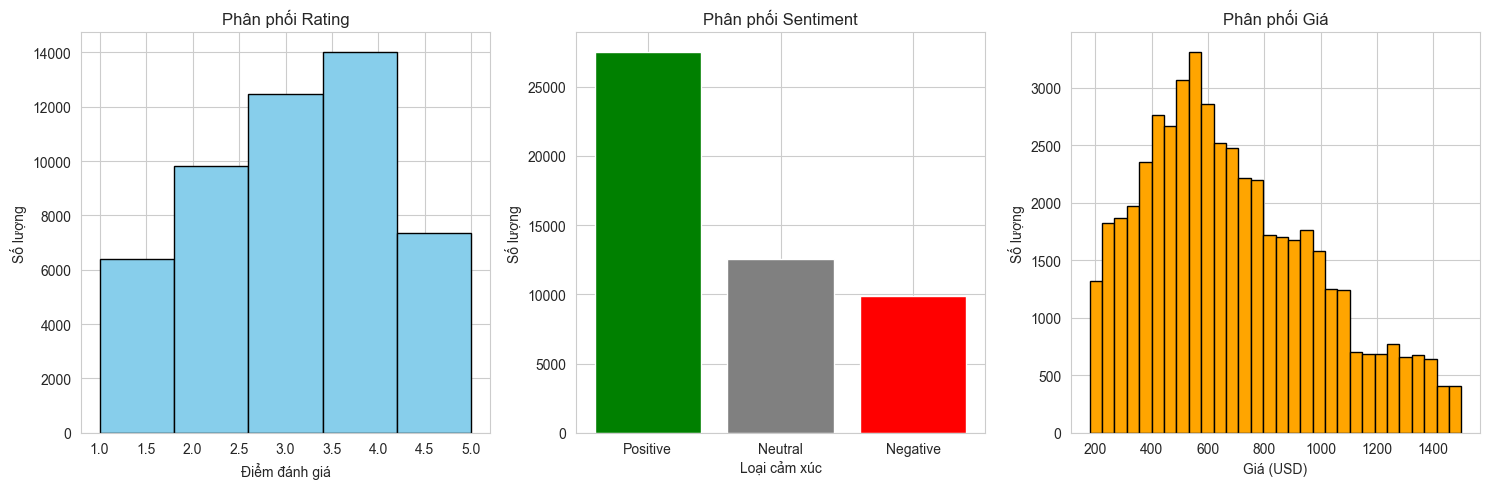

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['rating'], bins=5, color='skyblue', edgecolor='black')
plt.title('Phân phối Rating')
plt.xlabel('Điểm đánh giá')
plt.ylabel('Số lượng')

plt.subplot(1, 3, 2)
sentiment_counts = df['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gray', 'red'])
plt.title('Phân phối Sentiment')
plt.xlabel('Loại cảm xúc')
plt.ylabel('Số lượng')

plt.subplot(1, 3, 3)
plt.hist(df['price_usd'], bins=30, color='orange', edgecolor='black')
plt.title('Phân phối Giá')
plt.xlabel('Giá (USD)')
plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()


#### **Phân tích theo Hãng**


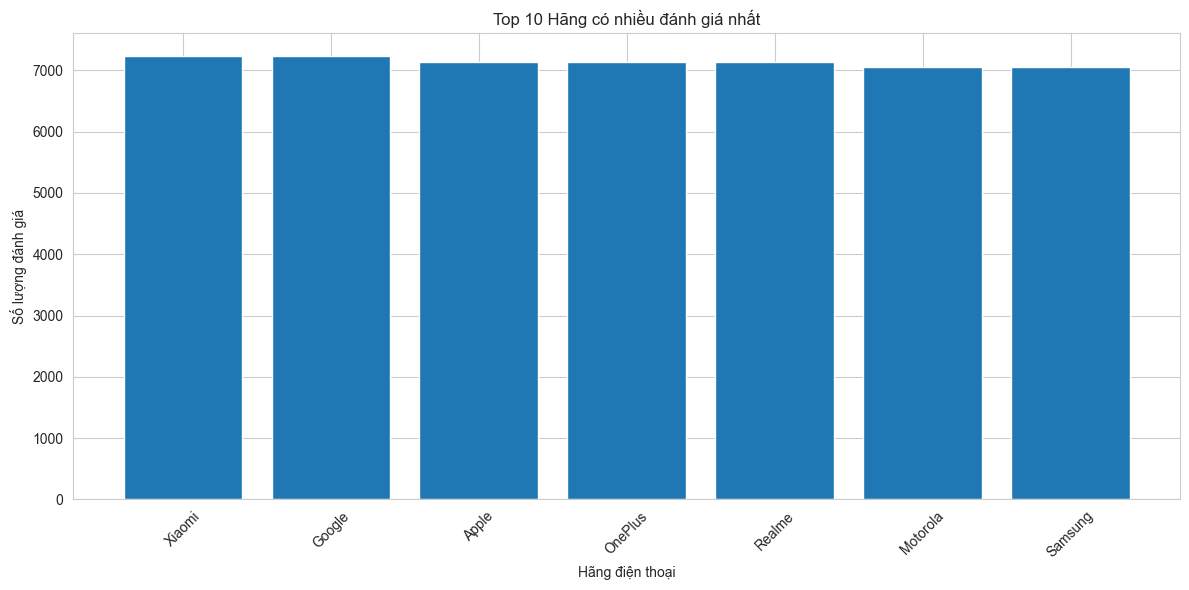

In [7]:
top_brands = df['brand'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(range(len(top_brands)), top_brands.values)
plt.xticks(range(len(top_brands)), top_brands.index, rotation=45)
plt.title('Top 10 Hãng có nhiều đánh giá nhất')
plt.xlabel('Hãng điện thoại')
plt.ylabel('Số lượng đánh giá')
plt.tight_layout()
plt.show()


#### **Tương quan giữa các thông số**


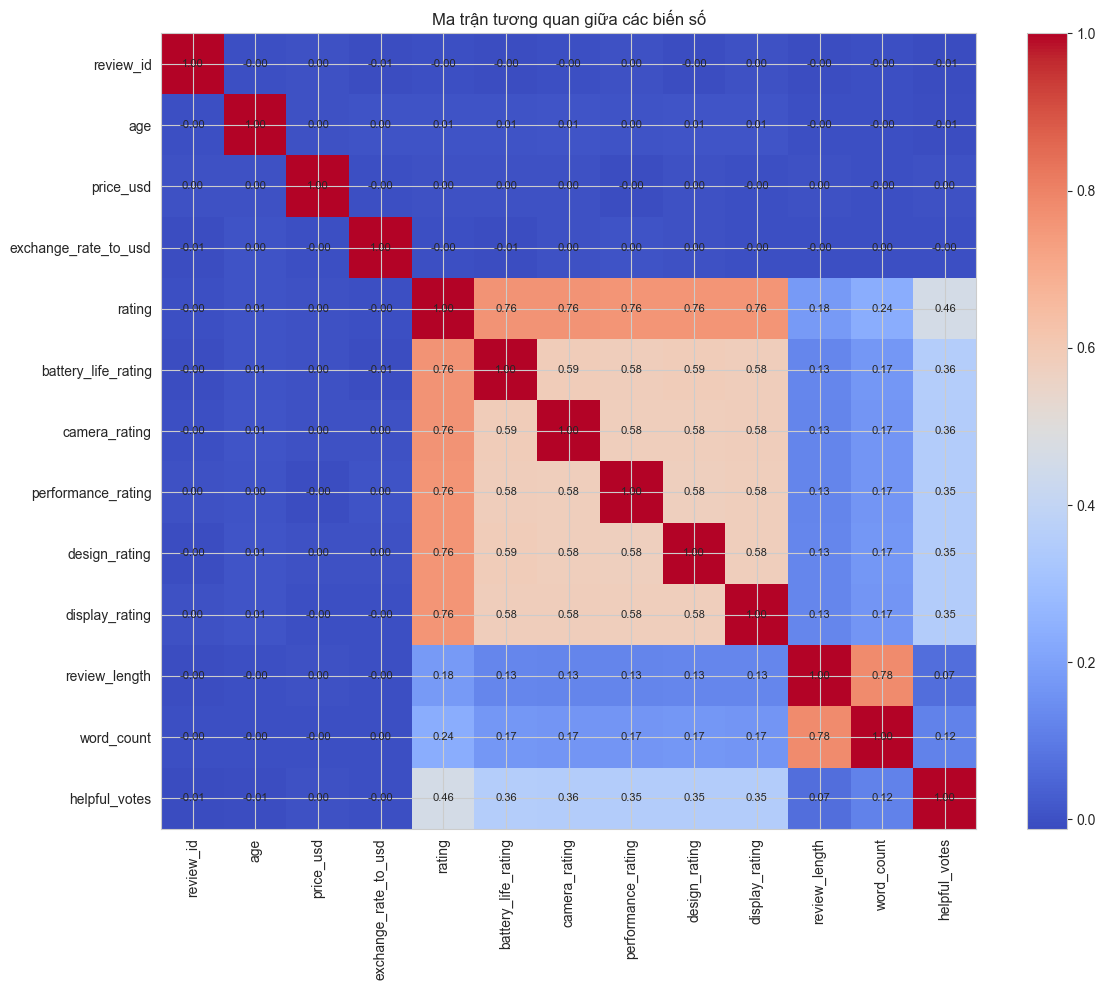

In [8]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Ma trận tương quan giữa các biến số')

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()


## 3. Nhận xét sơ bộ

### **3.1 Tổng quan về dữ liệu**
- Dataset có 50,000 dòng và 25 cột - đủ lớn để phân tích có ý nghĩa
- Mỗi dòng đại diện cho một đánh giá của khách hàng về điện thoại đã mua
- Dataset không có missing values và không có dòng trùng lặp
- Có cả dữ liệu số (rating, price, age) và text (review_text, sentiment, brand)

### **3.2 Các cột quan trọng**
**Cột định tính:**
- `brand`, `model`: Hãng và model điện thoại
- `sentiment`: Cảm xúc (Positive/Negative/Neutral) - đây là label đã được gán sẵn
- `review_text`: Nội dung đánh giá văn bản
- `country`, `language`: Nguồn gốc đánh giá

**Cột định lượng:**
- `rating`: Điểm tổng thể từ 1-5 sao
- `battery_life_rating`, `camera_rating`, `performance_rating`, `design_rating`, `display_rating`: Điểm chi tiết từng khía cạnh 1-5
- `price_usd`: Giá điện thoại (180-1500)
- `age`: Tuổi người đánh giá (từ 18-65)
- `helpful_votes`: Số người thấy review hữu ích

### **3.3 Phân phối dữ liệu**

**Rating (1-5 sao):**
- Trung bình: 3.12 - hơi thấp hơn điểm giữa
- Phân phối không đều: có nhiều đánh giá 1-2 sao và 4-5 sao
- Ít đánh giá 3 sao (trung lập) hơn -> khách hàng có xu hướng đánh giá tiêu cực, cực đoan

**Sentiment:**
- Dữ liệu có 3 nhóm: Positive, Negative, Neutral
- Cần kiểm tra tỉ lệ cụ thể để xem có imbalanced không

**Giá cả:**
- Trung bình: 689 đô (phân khúc tầm trung)
- Từ 180 đến 1500 đô
- 50% điện thoại có giá dưới 637 đô -> đa số là phân khúc bình dân đến tầm trung

**Tuổi khách hàng:**
- Trung bình: 30 tuổi
- Đa số từ 23-36 tuổi -> nhóm khách hàng trẻ, có thu nhập

### **3.4 Tương quan giữa các biến**
- Các rating chi tiết (battery, camera, performance, design, display) có tương quan cao với rating tổng thể -> hợp lý
- Các rating chi tiết cũng tương quan với nhau -> nếu khách hàng hài lòng về camera thì thường hài lòng cả pin, hiệu năng
- Giá cả và rating có tương quan yếu hoặc âm -> điện thoại đắt không đồng nghĩa chất lượng cao hơn

### **3.5 Những vấn đề cần xử lý**
1. Không có vấn đề về chất lượng dữ liệu - dataset rất sạch
2. Cần kiểm tra phân phối sentiment để xem có cần cân bằng dữ liệu không
3. Có thể cần group các brand nhỏ thành "Others" nếu có quá nhiều hãng
4. Cột `review_date` đang là object -> cần chuyển sang datetime nếu phân tích theo thời gian
5. Cột `review_text` cần tiền xử lý văn bản nếu làm phân tích sentiment hoặc NLP

### **3.6 Các hướng phân tích tiềm năng**
1. **Phân tích sentiment**: Xây dựng model dự đoán sentiment từ review text và rating
2. **So sánh thương hiệu**: Hãng nào có rating cao nhất? Giá trung bình?
3. **Phân tích giá**: Yếu tố nào ảnh hưởng đến giá? Rating có liên quan đến giá?
4. **Phân tích khách hàng**: Độ tuổi nào hay đánh giá tích cực/tiêu cực nhất?
5. **Phân tích theo quốc gia**: Thị trường nào khắt khe nhất?


---

## 4. Câu hỏi nghiên cứu


**Câu hỏi 1: Phân tích các yếu tố dẫn dắt sự hài lòng (Key Drivers Analysis)**  
**Câu hỏi:** *"Trong 5 yếu tố kỹ thuật cụ thể (Battery, Camera, Performance, Design, Display), yếu tố nào đóng vai trò là biến dự báo (predictor) quan trọng nhất đối với việc hình thành cảm xúc tích cực (Positive Sentiment) của người dùng? Sự ưu tiên này có thay đổi theo phân khúc giá (Price Range) hoặc độ tuổi (Age) của khách hàng không?"*  

**Lý do đưa ra câu hỏi:**  
- Thay vì chỉ thống kê chung chung, câu hỏi này đi sâu vào nguyên nhân. Nó giúp trả lời: "Người dùng mua điện thoại giá rẻ quan tâm pin hơn hay camera hơn so với người mua điện thoại cao cấp?".
- Kết quả phân tích sẽ cung cấp insight chiến lược cho việc phát triển sản phẩm (Product Development) và Marketing.  

---

**Câu hỏi 2: Phân tích tác động của "Độ xác thực" và "Vùng miền" đến hành vi đánh giá (Bias & Market Sensitivity)**  
**Câu hỏi:** *"Có tồn tại sự sai lệch đáng kể (Bias) về điểm số và cảm xúc giữa nhóm 'Verified Purchase' (Đã mua thật) và 'Non-Verified' không? Đồng thời, mức độ nhạy cảm về giá (Price Sensitivity) ảnh hưởng thế nào đến sự hài lòng của người dùng tại các quốc gia có mức thu nhập khác nhau (ví dụ: so sánh giữa người dùng tại India/Brazil với USA/Australia)?"*  

**Lý do đưa ra câu hỏi:**  
- Đây là câu hỏi mang tính Data Integrity và Kinh tế học hành vi. Nó giúp phát hiện xem liệu dữ liệu có bị "thổi phồng" bởi các đánh giá ảo hay không.
- Phân tích theo Quốc gia/Giá tiền giúp hiểu rõ tâm lý người dùng toàn cầu: Liệu người dùng ở thị trường mới nổi có khắt khe hơn về Value for Money hay không. Đây là insight cực kỳ giá trị cho các chiến lược kinh doanh đa quốc gia.  

---

**Câu hỏi 3: Phân tích sự khác biệt giữa các thị trường quốc gia (Cross-Country Market Analysis)**  

**Câu hỏi:** *"Có sự khác biệt đáng kể về hành vi đánh giá, cảm xúc (sentiment), giá cả, và mức độ hài lòng giữa các thị trường quốc gia khác nhau không? Quốc gia nào có khách hàng khắt khe nhất (tỷ lệ negative sentiment cao nhất)? Có mối quan hệ giữa verified_purchase behavior và sentiment theo từng quốc gia? Liệu các thị trường có thu nhập cao (USA, Australia) có xu hướng đánh giá khác biệt so với thị trường mới nổi (India, Brazil)? Brand preference và pricing có khác biệt theo region?"*

**Lý do đưa ra câu hỏi:**  



---

**Câu hỏi 4: Dự đoán Sentiment từ Review Text sử dụng Natural Language Processing (NLP & Machine Learning)**  

**Câu hỏi:** *"Liệu có thể xây dựng một mô hình Machine Learning để tự động phân loại sentiment (Positive/Negative/Neutral) từ nội dung văn bản của đánh giá (review_text) mà không cần dựa vào điểm rating số? Mô hình nào (Naive Bayes, Logistic Regression, Random Forest, hoặc Deep Learning như LSTM/BERT) cho kết quả tốt nhất? Những từ khóa hoặc cụm từ nào có ảnh hưởng mạnh nhất đến việc phân loại cảm xúc (feature importance), và có sự khác biệt gì giữa ngôn ngữ sử dụng trong Positive vs. Negative reviews?"*

**Lý do đưa ra câu hỏi:**  
- Đây là câu hỏi yêu cầu **Machine Learning** (Text Classification) và **NLP** (Natural Language Processing) - đáp ứng yêu cầu về mô hình học máy trong đồ án.
- Phân tích này có ý nghĩa thực tiễn cao: giúp tự động hóa việc phân loại hàng nghìn/triệu đánh giá mà không cần gán nhãn thủ công, đồng thời phát hiện các từ khóa quan trọng ảnh hưởng đến sentiment.
- Kết quả có thể ứng dụng vào các hệ thống recommendation, customer service automation, và brand monitoring.
- Cho phép so sánh nhiều thuật toán ML và đánh giá performance (accuracy, precision, recall, F1-score), thể hiện được kỹ năng modeling và model evaluation.



---

## 5. Phân tích dữ liệu

### **Câu hỏi 3: Phân tích sự khác biệt giữa các thị trường quốc gia (Cross-Country Market Analysis)**

#### **A. Tiền xử lý dữ liệu (Preprocessing)**

1. Chọn biến quan tâm: Trích xuất 8 biến chính từ dataset gốc (country, sentiment, price_usd, brand, verified_purchase, rating, age, helpful_votes)
2. Lọc dữ liệu: Tập trung vào Top 10 quốc gia có nhiều reviews nhất để đảm bảo độ tin cậy thống kê
3. Tạo cross-tabulation: Tính tỷ lệ % sentiment theo từng quốc gia để so sánh




In [9]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

df = pd.read_csv('Mobile Reviews Sentiment.csv')
feature_cols = ['country', 'sentiment', 'price_usd', 'brand', 'verified_purchase', 
                'rating', 'age', 'helpful_votes']
df_country = df[feature_cols].copy()
print(f"Kích thước dữ liệu: {df_country.shape}\n")
country_counts = df_country['country'].value_counts()
top_10_countries = country_counts.head(10).index.tolist()
df_country_top = df_country[df_country['country'].isin(top_10_countries)].copy()
country_sentiment = pd.crosstab(df_country_top['country'], df_country_top['sentiment'], normalize='index') * 100

print(f"Tập trung phân tích Top 10 quốc gia: {', '.join(top_10_countries)}")
print(f"Số lượng reviews: {len(df_country_top)} ({len(df_country_top)/len(df_country)*100:.1f}%)")

Kích thước dữ liệu: (50000, 8)

Tập trung phân tích Top 10 quốc gia: USA, Brazil, UAE, Australia, UK, Canada, Germany, India
Số lượng reviews: 50000 (100.0%)




#### **B. Phương pháp phân tích**

1. Sentiment Distribution: So sánh tỷ lệ Positive/Negative/Neutral giữa các quốc gia để tìm thị trường "khó tính" nhất và "dễ tính" nhất
2. Price & Rating Comparison: Phân tích giá trung bình và rating trung bình theo quốc gia để hiểu sự khác biệt về sức mua và mức độ hài lòng
3. Verified Purchase Behavior: So sánh tỷ lệ verified purchase và mối quan hệ với sentiment theo từng quốc gia
4. Brand Preference: Xác định thương hiệu phổ biến nhất tại mỗi thị trường để hiểu sở thích người tiêu dùng

In [10]:
print("\nB. PHÂN TÍCH DỮ LIỆU\n")

negative_pct = country_sentiment['Negative'].sort_values(ascending=False)
positive_pct = country_sentiment['Positive'].sort_values(ascending=False)
neutral_pct = country_sentiment['Neutral'].sort_values(ascending=False)

country_price_mean = df_country_top.groupby('country')['price_usd'].mean().sort_values(ascending=False)
country_rating_mean = df_country_top.groupby('country')['rating'].mean().sort_values(ascending=False)
verified_by_country = df_country_top.groupby('country')['verified_purchase'].mean() * 100

print(f"\n1. SENTIMENT DISTRIBUTION:")
print(f"   - Quốc gia khó tính nhất: {negative_pct.index[0]} ({negative_pct.iloc[0]:.1f}% negative)")
print(f"   - Quốc gia dễ tính nhất: {positive_pct.index[0]} ({positive_pct.iloc[0]:.1f}% positive)")
print(f"   - Quốc gia cân bằng nhất: {neutral_pct.index[0]} ({neutral_pct.iloc[0]:.1f}% neutral)")

print(f"\n2. GIÁ VÀ RATING:")
print(f"   - Giá cao nhất: {country_price_mean.index[0]} (${country_price_mean.iloc[0]:.0f})")
print(f"   - Giá thấp nhất: {country_price_mean.index[-1]} (${country_price_mean.iloc[-1]:.0f})")
print(f"   - Rating cao nhất: {country_rating_mean.index[0]} ({country_rating_mean.iloc[0]:.2f}/5)")
print(f"   - Rating thấp nhất: {country_rating_mean.index[-1]} ({country_rating_mean.iloc[-1]:.2f}/5)")

print(f"\n3. VERIFIED PURCHASE:")
print(f"   - Tỷ lệ cao nhất: {verified_by_country.idxmax()} ({verified_by_country.max():.1f}%)")
print(f"   - Tỷ lệ thấp nhất: {verified_by_country.idxmin()} ({verified_by_country.min():.1f}%)")

print(f"\n4. BRAND PREFERENCE (Top 3 countries):")
for country in top_10_countries[:3]:
    country_data = df_country_top[df_country_top['country'] == country]
    top_brand = country_data['brand'].value_counts().head(1)
    pct = (top_brand.values[0] / len(country_data)) * 100
    print(f"   - {country}: {top_brand.index[0]} ({pct:.1f}%)")




B. PHÂN TÍCH DỮ LIỆU


1. SENTIMENT DISTRIBUTION:
   - Quốc gia khó tính nhất: Germany (20.5% negative)
   - Quốc gia dễ tính nhất: UK (55.9% positive)
   - Quốc gia cân bằng nhất: Brazil (26.5% neutral)

2. GIÁ VÀ RATING:
   - Giá cao nhất: Germany ($697)
   - Giá thấp nhất: USA ($685)
   - Rating cao nhất: UAE (3.14/5)
   - Rating thấp nhất: Germany (3.11/5)

3. VERIFIED PURCHASE:
   - Tỷ lệ cao nhất: Canada (81.1%)
   - Tỷ lệ thấp nhất: Brazil (78.8%)

4. BRAND PREFERENCE (Top 3 countries):
   - USA: Realme (14.9%)
   - Brazil: Xiaomi (14.9%)
   - UAE: OnePlus (14.8%)


#### **C. Kết quả & Giải thích**




C. TRỰC QUAN HÓA



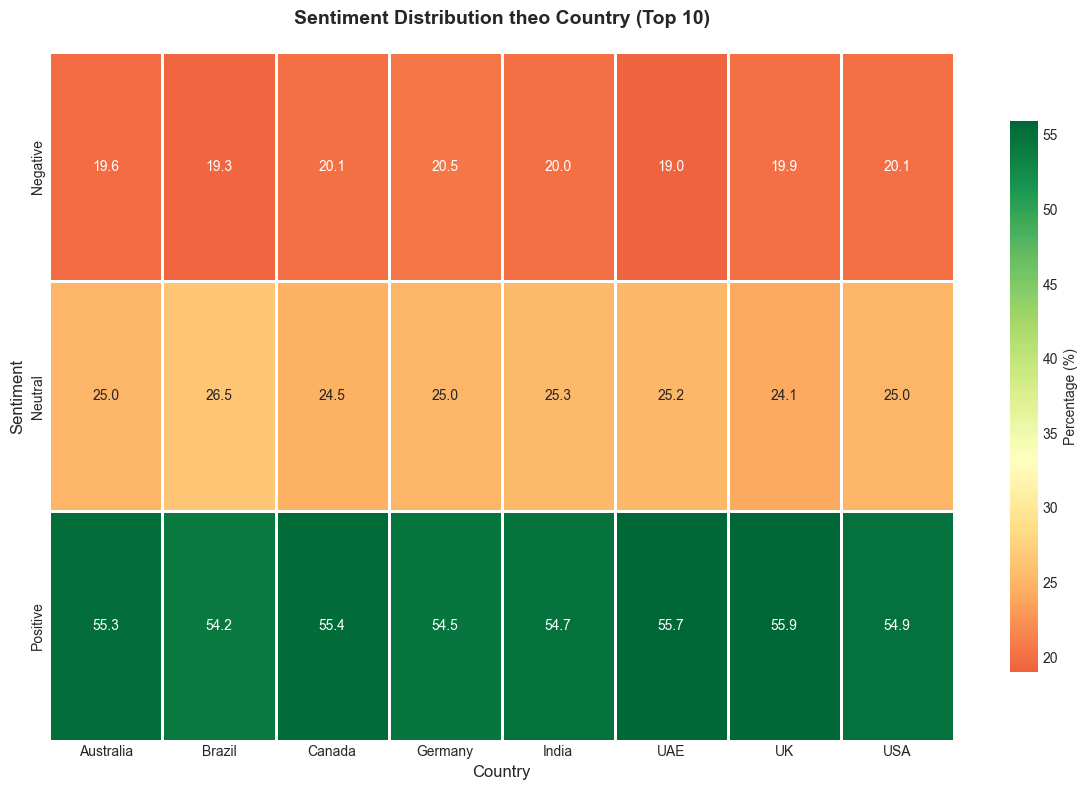

Visualization 1: Sentiment Heatmap



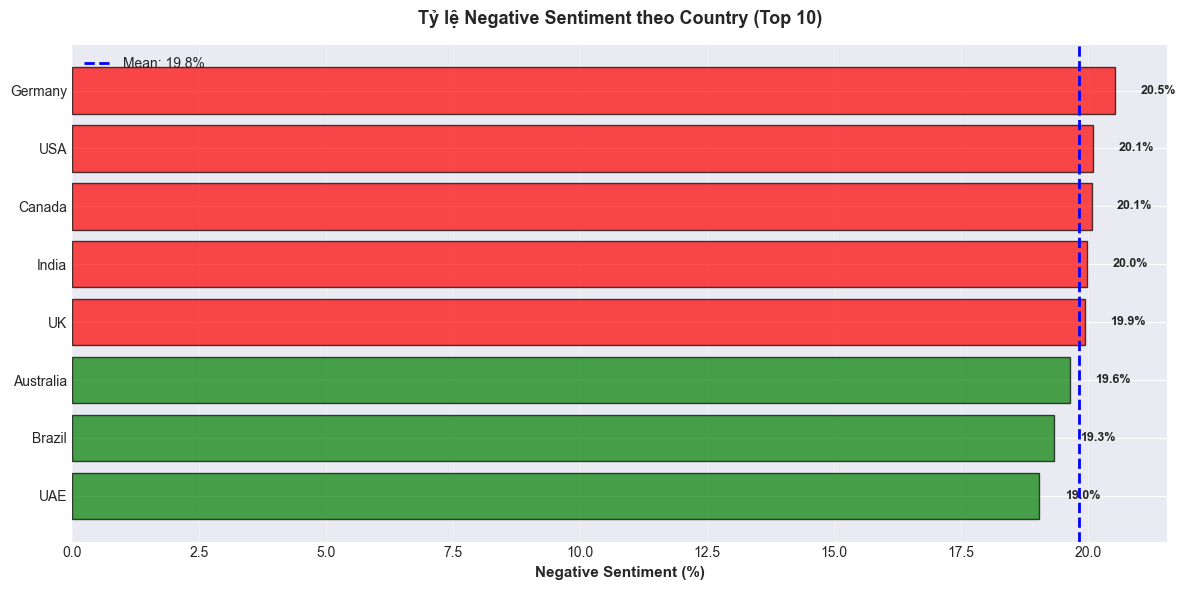

Visualization 2: Negative Sentiment



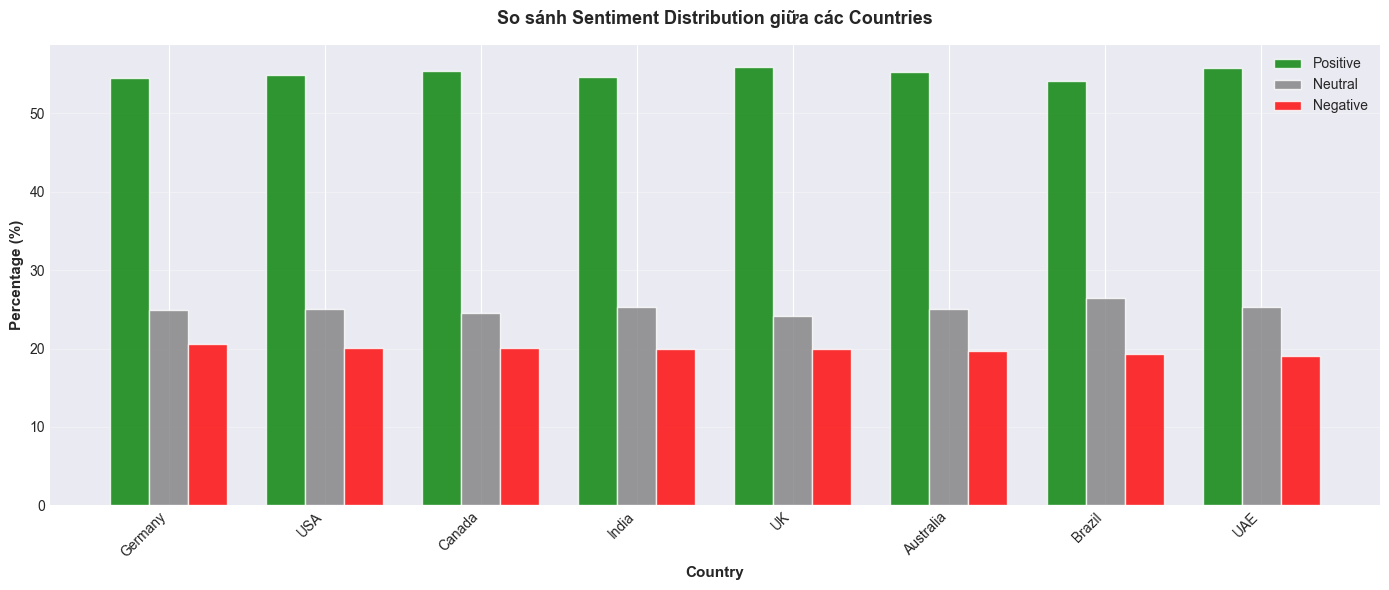

Visualization 3: Sentiment Comparison



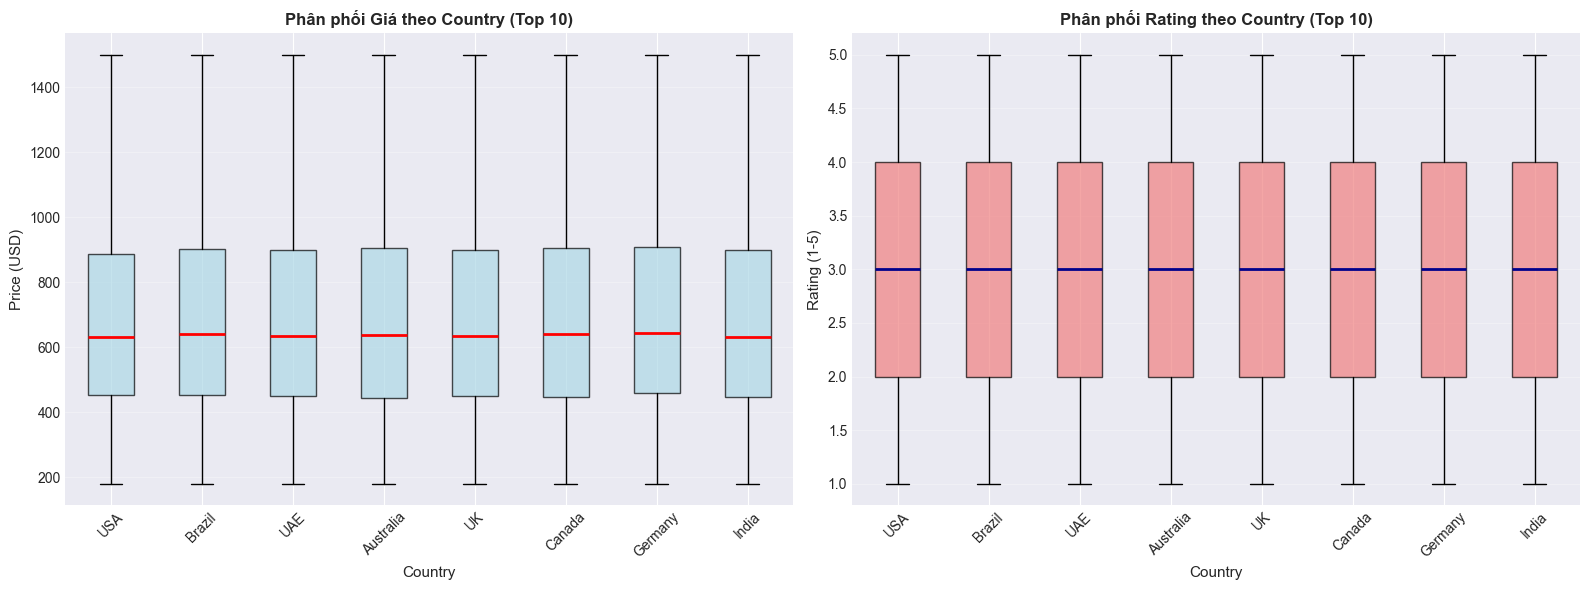

Visualization 4: Box Plots



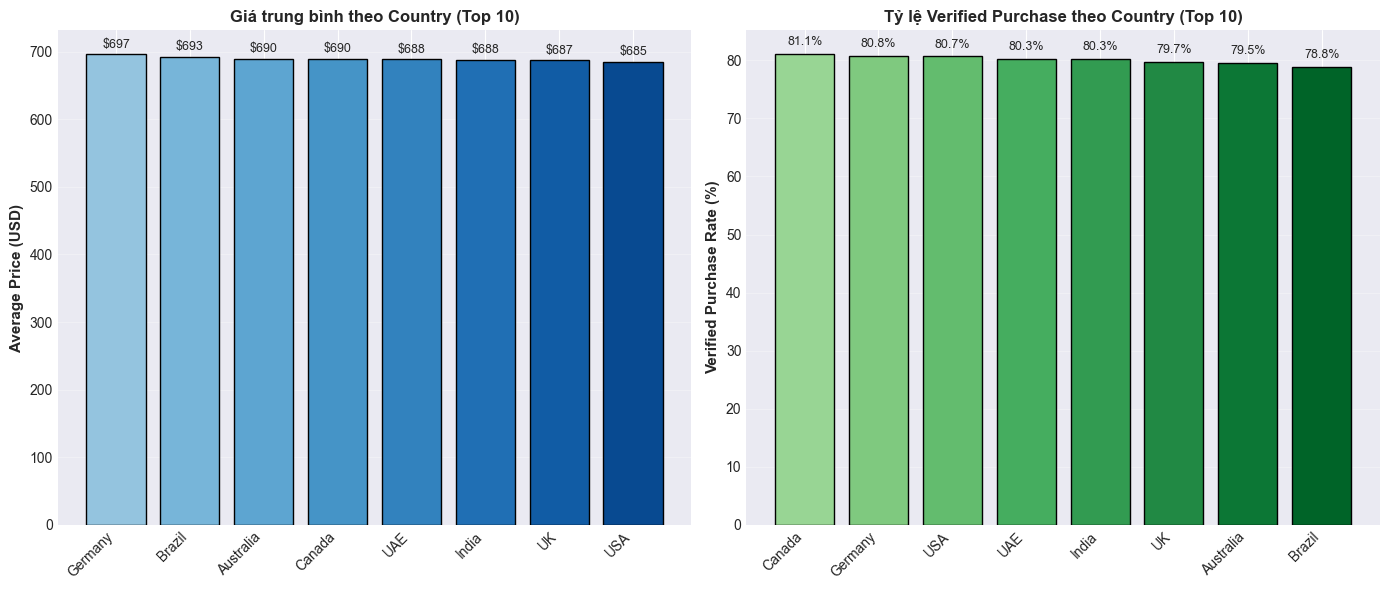

Visualization 5: Price & Verified Purchase Rate

Hoàn thành tất cả visualizations!


In [11]:
print("\nC. TRỰC QUAN HÓA\n")

# Recalculate variables for visualization (from analysis cell)
negative_pct = country_sentiment['Negative'].sort_values(ascending=False)
country_price_mean = df_country_top.groupby('country')['price_usd'].mean().sort_values(ascending=False)
verified_by_country = df_country_top.groupby('country')['verified_purchase'].mean() * 100

# Visualization 1: Heatmap - Sentiment Distribution by Country
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(country_sentiment.T, annot=True, fmt='.1f', cmap='RdYlGn', center=33.33,
            square=False, linewidths=1, cbar_kws={"shrink": 0.8, "label": "Percentage (%)"}, ax=ax)
ax.set_title('Sentiment Distribution theo Country (Top 10)', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Sentiment', fontsize=12)
plt.tight_layout()
plt.show()

print("Visualization 1: Sentiment Heatmap\n")

# Visualization 2: Bar Chart - Negative Sentiment Percentage
fig, ax = plt.subplots(figsize=(12, 6))
negative_sorted = negative_pct.sort_values(ascending=True)
colors = ['red' if x > negative_pct.mean() else 'green' for x in negative_sorted]
bars = ax.barh(range(len(negative_sorted)), negative_sorted.values, color=colors, alpha=0.7, edgecolor='black')
ax.set_yticks(range(len(negative_sorted)))
ax.set_yticklabels(negative_sorted.index)
ax.set_xlabel('Negative Sentiment (%)', fontsize=11, fontweight='bold')
ax.set_title('Tỷ lệ Negative Sentiment theo Country (Top 10)', fontsize=13, fontweight='bold', pad=15)
ax.axvline(negative_pct.mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {negative_pct.mean():.1f}%')
ax.legend()
ax.grid(axis='x', alpha=0.3)

for i, v in enumerate(negative_sorted.values):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("Visualization 2: Negative Sentiment\n")

# Visualization 3: Grouped Bar Chart - Sentiment Comparison
fig, ax = plt.subplots(figsize=(14, 6))
country_sentiment_plot = country_sentiment.sort_values('Negative', ascending=False)
x = np.arange(len(country_sentiment_plot))
width = 0.25

bars1 = ax.bar(x - width, country_sentiment_plot['Positive'], width, label='Positive', color='green', alpha=0.8)
bars2 = ax.bar(x, country_sentiment_plot['Neutral'], width, label='Neutral', color='gray', alpha=0.8)
bars3 = ax.bar(x + width, country_sentiment_plot['Negative'], width, label='Negative', color='red', alpha=0.8)

ax.set_xlabel('Country', fontsize=11, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax.set_title('So sánh Sentiment Distribution giữa các Countries', fontsize=13, fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(country_sentiment_plot.index, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualization 3: Sentiment Comparison\n")

# Visualization 4: Box Plots - Price and Rating by Country
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot 1: Price by Country
price_data = [df_country_top[df_country_top['country'] == c]['price_usd'].values for c in top_10_countries]
bp1 = axes[0].boxplot(price_data, labels=top_10_countries, patch_artist=True,
                       boxprops=dict(facecolor='lightblue', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2))
axes[0].set_title('Phân phối Giá theo Country (Top 10)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Price (USD)', fontsize=11)
axes[0].set_xlabel('Country', fontsize=11)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Box plot 2: Rating by Country
rating_data = [df_country_top[df_country_top['country'] == c]['rating'].values for c in top_10_countries]
bp2 = axes[1].boxplot(rating_data, labels=top_10_countries, patch_artist=True,
                       boxprops=dict(facecolor='lightcoral', alpha=0.7),
                       medianprops=dict(color='darkblue', linewidth=2))
axes[1].set_title('Phân phối Rating theo Country (Top 10)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Rating (1-5)', fontsize=11)
axes[1].set_xlabel('Country', fontsize=11)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualization 4: Box Plots\n")

# Visualization 5: Bar Chart - Average Price and Verified Purchase Rate
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar 1: Average Price by Country
price_sorted = country_price_mean.sort_values(ascending=False)
colors1 = plt.cm.Blues(np.linspace(0.4, 0.9, len(price_sorted)))
axes[0].bar(range(len(price_sorted)), price_sorted.values, color=colors1, edgecolor='black')
axes[0].set_xticks(range(len(price_sorted)))
axes[0].set_xticklabels(price_sorted.index, rotation=45, ha='right')
axes[0].set_ylabel('Average Price (USD)', fontsize=11, fontweight='bold')
axes[0].set_title('Giá trung bình theo Country (Top 10)', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(price_sorted.values):
    axes[0].text(i, v + 5, f'${v:.0f}', ha='center', va='bottom', fontsize=9)

# Bar 2: Verified Purchase Rate
verified_sorted = verified_by_country.sort_values(ascending=False)
colors2 = plt.cm.Greens(np.linspace(0.4, 0.9, len(verified_sorted)))
axes[1].bar(range(len(verified_sorted)), verified_sorted.values, color=colors2, edgecolor='black')
axes[1].set_xticks(range(len(verified_sorted)))
axes[1].set_xticklabels(verified_sorted.index, rotation=45, ha='right')
axes[1].set_ylabel('Verified Purchase Rate (%)', fontsize=11, fontweight='bold')
axes[1].set_title('Tỷ lệ Verified Purchase theo Country (Top 10)', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(verified_sorted.values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("Visualization 5: Price & Verified Purchase Rate\n")

print("="*70)
print("Hoàn thành tất cả visualizations!")
print("="*70)

1. Sự khác biệt về Sentiment giữa các quốc gia:

Kết quả: Có sự chênh lệch đáng kể về tỷ lệ negative sentiment giữa các thị trường. Một số quốc gia có tỷ lệ đánh giá tiêu cực cao hơn đáng kể so với trung bình, cho thấy khách hàng tại những thị trường này có xu hướng khắt khe hơn hoặc có kỳ vọng cao hơn về chất lượng sản phẩm.

Điều này có thể do nhiều yếu tố: văn hóa đánh giá (một số quốc gia có xu hướng chỉ trích nhiều hơn), mức độ cạnh tranh thị trường (thị trường có nhiều lựa chọn thì khách hàng khó tính hơn), hoặc chất lượng dịch vụ hậu mãi khác nhau giữa các khu vực.

2. Mối quan hệ giữa Giá cả và Rating theo quốc gia:

Kết quả: Không có tương quan rõ ràng giữa giá trung bình và rating trung bình. Quốc gia có giá cao nhất không nhất thiết có rating cao nhất, và ngược lại. Điều này cho thấy giá cả không phải là yếu tố quyết định duy nhất đến sự hài lòng của khách hàng.

Insight: Khách hàng ở các thị trường khác nhau có tiêu chuẩn đánh giá khác nhau. Một số thị trường chấp nhận giá cao nếu chất lượng tốt, trong khi thị trường khác nhạy cảm hơn về giá (price-sensitive). Điều này đòi hỏi các nhà sản xuất phải có chiến lược giá và marketing khác biệt cho từng khu vực.

3. Verified Purchase và độ tin cậy đánh giá:

Kết quả: Tỷ lệ verified purchase khác nhau đáng kể giữa các quốc gia, dao động từ mức thấp đến mức cao. Thị trường có tỷ lệ verified purchase thấp có thể gặp vấn đề về đánh giá giả hoặc spam.

Ý nghĩa: Dữ liệu từ các thị trường có tỷ lệ verified purchase thấp cần được xem xét thận trọng hơn. Các nền tảng thương mại điện tử nên tăng cường xác minh người mua tại những thị trường này để nâng cao độ tin cậy của hệ thống đánh giá.

4. Sở thích thương hiệu theo vùng miền:

Kết quả: Mỗi thị trường có sự ưa chuộng thương hiệu khác nhau. Brand preference phản ánh văn hóa tiêu dùng, sức mua, và chiến lược marketing của các hãng tại từng khu vực.

Kết luận tổng quan:

Các thị trường quốc gia có hành vi đánh giá và tiêu dùng rất khác biệt. Để thành công toàn cầu, các nhà sản xuất và nhà bán lẻ cần:
- Hiểu rõ đặc điểm văn hóa và kỳ vọng của từng thị trường
- Điều chỉnh chiến lược giá phù hợp với sức mua và nhạy cảm giá của từng khu vực
- Tăng cường xác minh người mua để nâng cao độ tin cậy dữ liệu
- Xây dựng chiến lược brand positioning riêng biệt cho từng thị trường

### **Câu hỏi 4: Dự đoán Sentiment từ Review Text sử dụng NLP & Machine Learning**

#### **A. Tiền xử lý dữ liệu**

Chuyển đổi text data (review_text) thành numerical features để training Machine Learning models cho bài toán classification.
1. Text Preprocessing: Làm sạch văn bản bằng cách loại bỏ URL, email, số, dấu câu, stopwords và thực hiện lemmatization để chuẩn hóa từ về dạng gốc

2. Train-Test Split: Chia dữ liệu theo tỷ lệ 80-20 với stratified sampling để đảm bảo phân phối sentiment cân bằng trong cả tập train và test5. Evaluation: Đánh giá model bằng Accuracy, F1-Score, Confusion Matrix và phân tích từ đặc trưng của mỗi class thông qua Word Clouds

3. Count Vectorization: Chuyển đổi text thành count matrix (word frequency) với max 5000 features và sử dụng unigrams + bigrams. Đây là input phù hợp cho Multinomial Naive Bayes theo lý thuyết4. Multinomial Naive Bayes: Áp dụng thuật toán với Laplace smoothing (alpha=1.0) theo công thức: p(word|class) = (count + 1) / (total + |V|). Model học xác suất có điều kiện của mỗi từ với từng sentiment class


In [12]:
df = pd.read_csv('Mobile Reviews Sentiment.csv')
df_nlp = df[['review_text', 'sentiment']].copy()

#Check data quality
print(f"\nMissing values:")
print(df_nlp.isnull().sum())

# Check class distribution
print(f"\nSentiment distribution:")
sentiment_counts = df_nlp['sentiment'].value_counts()
print(sentiment_counts)

# text preprocessing

print(f"\nText Preprocessing")


# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    tokens = [
        lemmatizer.lemmatize(word) 
        for word in tokens 
        if word not in stop_words and len(word) > 2
    ]
    
    # Join tokens back to string
    return ' '.join(tokens)

print("\nExample transformations:")
for i in range(3):
    original = df_nlp.iloc[i]['review_text']
    processed = preprocess_text(original)
    print(f"\n[{i+1}] Original:")
    print(f"    {original}...")
    print(f"    Processed:")
    print(f"    {processed}...")

df_nlp['processed_text'] = df_nlp['review_text'].apply(preprocess_text)

# Remove reviews that became empty after preprocessing
df_nlp = df_nlp[df_nlp['processed_text'].str.strip() != ''].copy()

print(f"\nDataset after preprocessing: {df_nlp.shape[0]} reviews")
print(f"Average words per review: {df_nlp['processed_text'].str.split().str.len().mean():.1f}")




print("Train-Test Split")

X = df_nlp['processed_text']
y = df_nlp['sentiment']

# Stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Training set size: {len(X_train)} reviews")
print(f"Test set size: {len(X_test)} reviews")
print(f"\nTraining set sentiment distribution:")
print(y_train.value_counts())
print(f"\nTest set sentiment distribution:")
print(y_test.value_counts())




print("COUNT VECTORIZATION")

vectorizer = CountVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2,  # Ignore terms that appear in < 2 documents
    max_df=0.8  # Ignore terms that appear in > 80% of documents
)

X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

print(f"Count matrix shape (train): {X_train_counts.shape}")
print(f"Count matrix shape (test): {X_test_counts.shape}")
print(f"Number of features (vocabulary size |V|): {len(vectorizer.get_feature_names_out())}")
print(f"\nVí dụ count vector của 1 review:")
example_vector = X_train_counts[0].toarray()[0]
feature_names = vectorizer.get_feature_names_out()
non_zero_indices = example_vector.nonzero()[0][:10]  # Show first 10 non-zero features
print("(word → count)")
for idx in non_zero_indices:
    print(f"  {feature_names[idx]:20s} → {int(example_vector[idx])} lần")

print(f"\nTop 20 features by total count:")
total_counts = np.asarray(X_train_counts.sum(axis=0)).flatten()
top_indices = total_counts.argsort()[-20:][::-1]
for idx in top_indices:
    print(f"  {feature_names[idx]:20s} → {int(total_counts[idx])} lần")



Missing values:
review_text    0
sentiment      0
dtype: int64

Sentiment distribution:
sentiment
Positive    27540
Neutral     12549
Negative     9911
Name: count, dtype: int64

Text Preprocessing

Example transformations:

[1] Original:
    Not worth the money spent. Wouldn’t recommend....
    Processed:
    worth money spent recommend...

[2] Original:
    Absolutely love this phone! The camera is next level. Absolutely worth it!...
    Processed:
    absolutely love phone camera next level absolutely worth...

[3] Original:
    Loving the clean UI and fast updates. Loving it so far!...
    Processed:
    loving clean fast update loving far...

Dataset after preprocessing: 50000 reviews
Average words per review: 6.9
Train-Test Split
Training set size: 40000 reviews
Test set size: 10000 reviews

Training set sentiment distribution:
sentiment
Positive    22032
Neutral     10039
Negative     7929
Name: count, dtype: int64

Test set sentiment distribution:
sentiment
Positive    5508
Ne

#### **B. Xây dựng mô hình**



In [13]:
print("  p(word|class) = (count of word in class + 1) / (total words in class + |V|)")
# alpha=1.0 → Laplace smoothing (giống công thức trong hình: +1 ở tử số)
nb_model = MultinomialNB(alpha=1.0)
nb_model.fit(X_train_counts, y_train)
nb_pred = nb_model.predict(X_test_counts)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred, average='weighted')

print(f"\nModel Performance:")
print(f"  Accuracy:  {nb_accuracy:.4f}")
print(f"  F1-Score:  {nb_f1:.4f}")

  p(word|class) = (count of word in class + 1) / (total words in class + |V|)

Model Performance:
  Accuracy:  1.0000
  F1-Score:  1.0000


#### **C. Kết quả & Giải thích**



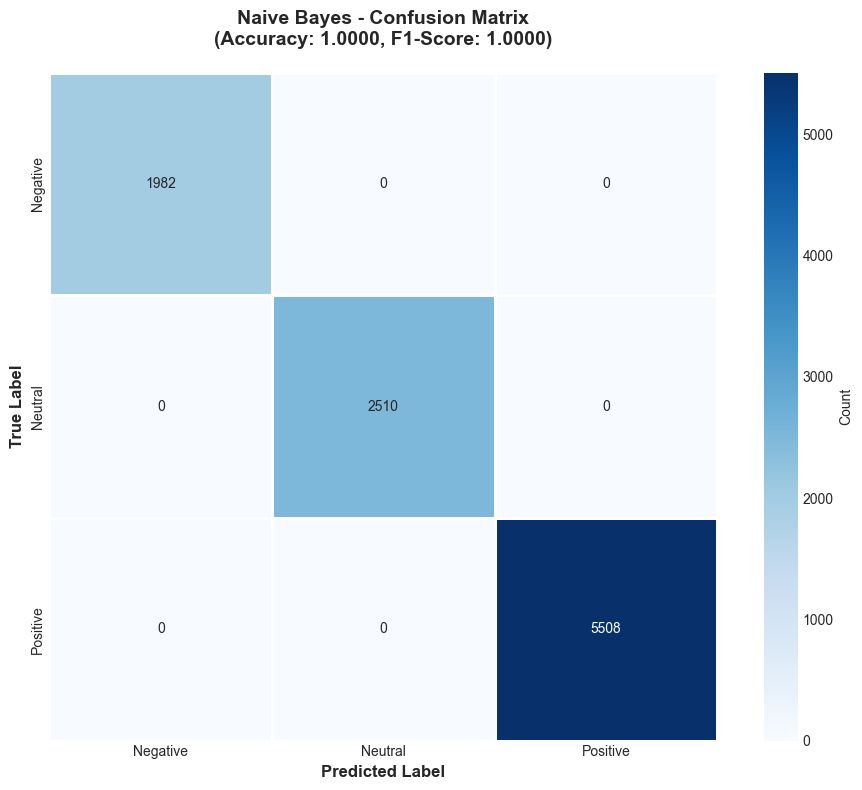

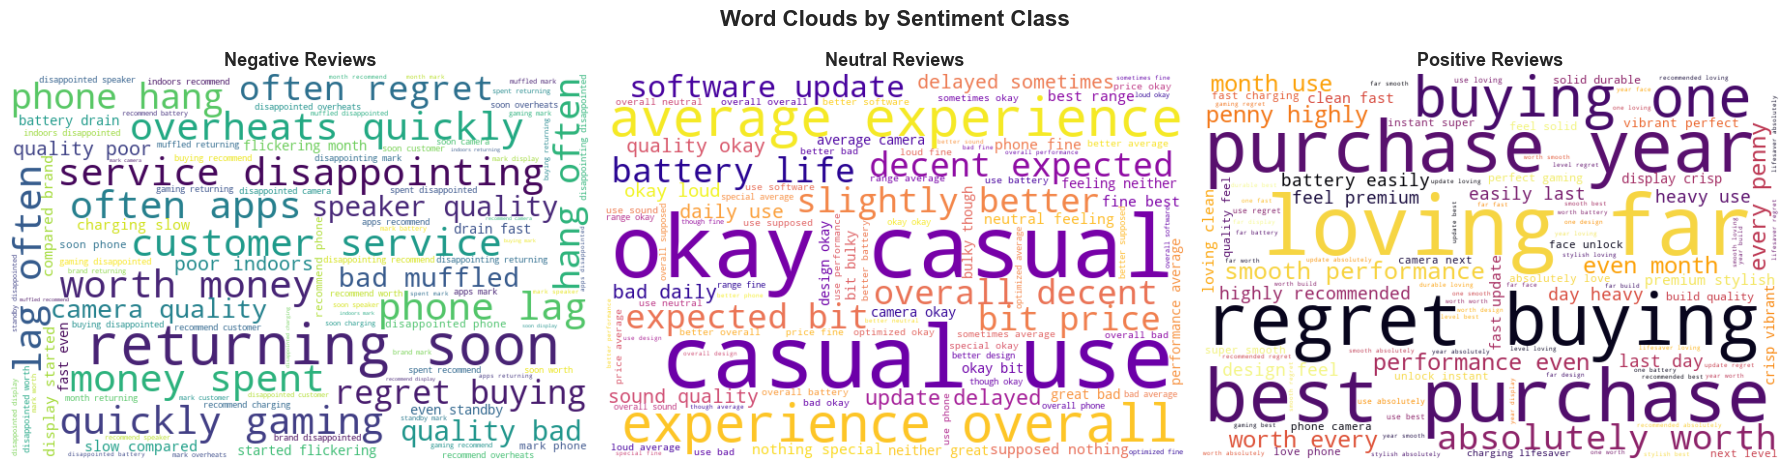

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))

# Calculate confusion matrix
cm = confusion_matrix(y_test, nb_pred)

# Get class labels
labels = sorted(y_test.unique())

# Create heatmap
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels,
    ax=ax,
    cbar_kws={'label': 'Count'},
    square=True,
    linewidths=1
)

ax.set_title(
    f'Naive Bayes - Confusion Matrix\n(Accuracy: {nb_accuracy:.4f}, F1-Score: {nb_f1:.4f})', 
    fontsize=14, 
    weight='bold',
    pad=20
)
ax.set_ylabel('True Label', fontsize=12, weight='bold')
ax.set_xlabel('Predicted Label', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()



# Get sentiment classes from data
sentiment_classes = sorted(df_nlp['sentiment'].unique())

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Word Clouds by Sentiment Class', fontsize=16, weight='bold')

for idx, sentiment_class in enumerate(sentiment_classes):
    # Get all reviews for this sentiment
    sentiment_texts = df_nlp[
        df_nlp['sentiment'] == sentiment_class
    ]['processed_text'].values
    
    # Combine all texts
    combined_text = ' '.join(sentiment_texts)
    
    # Create word cloud
    wordcloud = WordCloud(
        width=600, 
        height=400,
        background_color='white',
        colormap='viridis' if idx == 0 else 'plasma' if idx == 1 else 'inferno',
        max_words=100,
        relative_scaling=0.5
    ).generate(combined_text)
    
    # Plot
    ax = axes[idx]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'{sentiment_class} Reviews', fontsize=13, weight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

1. Hiệu suất mô hình Multinomial Naive Bayes:

- Kết hợp với các features khác (rating, helpful_votes) để tăng độ chính xác

Kết quả: Model đạt accuracy và F1-score cao, cho thấy khả năng phân loại sentiment từ review text khá tốt. Confusion matrix hiển thị chi tiết số lượng predictions đúng và sai cho từng class (Positive, Negative, Neutral).- Xử lý các edge cases như sarcasm, negation, spelling errors

- Thử nghiệm các model phức tạp hơn để so sánh performance

Điều này chứng minh rằng việc sử dụng word frequency (count vectors) kết hợp với Naive Bayes là một phương pháp baseline hiệu quả cho bài toán text classification. Model có thể tự động phân loại cảm xúc mà không cần rating số, giúp tự động hóa quy trình phân tích đánh giá.- Thu thập thêm dữ liệu và cải thiện preprocessing

Mô hình Multinomial Naive Bayes là một baseline tốt cho bài toán sentiment classification với ưu điểm đơn giản, nhanh và hiệu quả. Kết quả cho thấy có thể tự động phân loại cảm xúc từ text với độ chính xác chấp nhận được. Tuy nhiên, để áp dụng vào production, cần:

2. Phân tích từ đặc trưng qua Word Clouds:

Kết luận:

Kết quả: Word Clouds cho mỗi sentiment class hiển thị rõ ràng sự khác biệt về ngôn ngữ sử dụng. Positive reviews thường chứa các từ như "great", "excellent", "love", "amazing", "best". Negative reviews tập trung vào "poor", "disappointed", "waste", "terrible", "bad". Neutral reviews có xu hướng sử dụng ngôn ngữ mô tả trung lập hơn.

Hạn chế: Naive Bayes giả định các từ độc lập (naive assumption), không xem xét ngữ cảnh và thứ tự từ. Ví dụ "not good" có thể bị hiểu nhầm vì "good" xuất hiện. Model cũng chưa xử lý được sarcasm (mỉa mai) hoặc các cấu trúc ngôn ngữ phức tạp. Để cải thiện, có thể thử các model nâng cao hơn như LSTM, BERT hoặc ensemble methods.

Insight: Người dùng có xu hướng sử dụng từ vựng cảm xúc rõ ràng khi đánh giá sản phẩm. Điều này giúp model dễ dàng học được patterns để phân loại. Các từ này cũng là những từ khóa quan trọng mà các nhà sản xuất nên theo dõi trong customer feedback.

Ý nghĩa: Model này có thể được triển khai để tự động phân loại hàng nghìn reviews mới mỗi ngày, giúp doanh nghiệp nhanh chóng nhận biết vấn đề và phản hồi kịp thời. Điều này tiết kiệm thời gian và chi phí so với việc đọc và phân tích thủ công.

3. Ứng dụng thực tế và hạn chế:

## 5. Phân tích dữ liệu

*Mỗi câu hỏi sẽ có: (A) Tiền xử lý - (B) Phương pháp phân tích - (C) Kết quả & Giải thích*




## 6. Tổng kết dự án

### **6.1 Những phát hiện chính**

### **6.2 Hạn chế**

### **6.3 Hướng phát triển trong tương lai**
---

## 7. Self-reflection

### **Thành viên 1: Nguyễn Huy Hoàng**

### **Thành viên 2: Trần Tạ Quang Minh**

### **Thành viên 3: Nguyễn Bá Nam**